In [1]:
#Exploratory Data Ananlysis on cab rides

In [3]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt #The datetime module supplies classes for the manipulation of date and time.
%matplotlib inline

In [7]:
cab_df=pd.read_csv('/Users/ankitabhattacharjee/Downloads/Cab_Ride.csv',encoding='utf-8')

In [8]:
#check imported data 
cab_df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN


In [9]:
#check the number of rows and columns
cab_df.shape

(1117, 7)

In [10]:
#check the datatype of the variable
cab_df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [11]:
#create a function fix data tyoes of data columns
#the strptime() class method takes two arguments
#string(that be converted to date time)and format the code.
# considering the date is in the mm/dd/yyyy format

def convert_time(column_name):
    y=[]
    for x in cab_df[column_name]:
        y.append(dt.datetime.strptime(x, "%m-%d-%Y %H:%M"))
    cab_df[column_name]=y

In [12]:
#date time formats.
#NOW convert the columns in date and time format
column_date=cab_df[['START_DATE','END_DATE']]
for x in column_date:
    convert_time(x)

In [13]:
#use info function to check the data type and the mising values
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1117 non-null   datetime64[ns]
 1   END_DATE    1117 non-null   datetime64[ns]
 2   CATEGORY    1117 non-null   object        
 3   START       1117 non-null   object        
 4   STOP        1117 non-null   object        
 5   MILES       1117 non-null   float64       
 6   PURPOSE     616 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 61.2+ KB


In [14]:
#basic description of data 
#We can use the describe() to get summary statictics
#define include="all" if you want to describe object type variable
cab_df.describe()

,MILES
count,1117.000000
mean,10.631513
std,21.894507
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [15]:
#check for the missing values
missing=cab_df.isnull().sum()
missing

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       501
dtype: int64

In [16]:
#calculate the mode
cab_df.mode(axis=0, numeric_only=False, dropna=True)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Cary,Cary,9.9,Meeting


In [18]:
#fill missing values by mode
cab_df['PURPOSE'].fillna("Meeting", inplace=True)

In [20]:
#again check for the missing values
missing=cab_df.isnull().sum()
missing

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

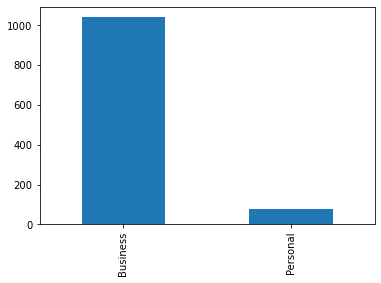

In [21]:
#plot number of trip at each category
x=cab_df['CATEGORY'].value_counts().plot(kind='bar')

In [24]:
#number of trips per month
#extract month from the start date
count=0
mt=[]
while count < len(cab_df):
    mt.append(cab_df['START_DATE'][count].month)
    count=count+1
cab_df['Month']=mt

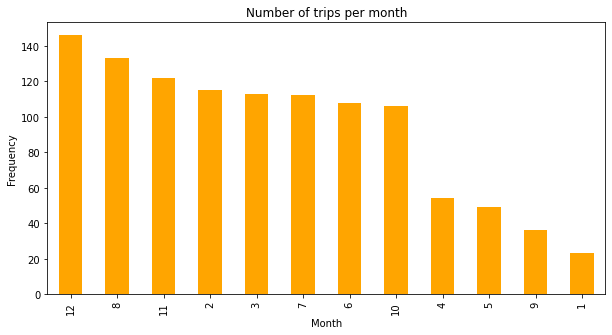

In [28]:
#plot number of trips at each month
x=cab_df['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per month')
plt.show()

In [29]:
#calculate the duration of each trip in minutes

cab_df['Duration_Minutes']= cab_df['END_DATE']-cab_df['START_DATE']
cab_df['Duration_Minutes']

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1112   0 days 00:07:00
1113   0 days 00:18:00
1114   0 days 00:35:00
1115   0 days 00:18:00
1116   0 days 01:43:00
Name: Duration_Minutes, Length: 1117, dtype: timedelta64[ns]

In [30]:
cab_df['Duration_Minutes'][0]

Timedelta('0 days 00:06:00')

In [31]:
#convert the time format in to minutes
minutes=[]
for x in cab_df['Duration_Minutes']:
    minutes.append(x.seconds/60)
cab_df['Duration_Minutes']=minutes

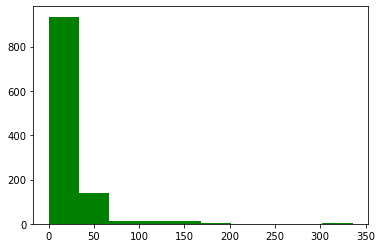

In [32]:
plt.hist(cab_df['Duration_Minutes'],bins=10,color='green')
plt.show()

In [33]:
cab_df['Duration_Minutes'].describe()


count    1117.000000
mean       23.449418
std        27.682733
min         0.000000
25%        10.000000
50%        17.000000
75%        28.000000
max       336.000000
Name: Duration_Minutes, dtype: float64

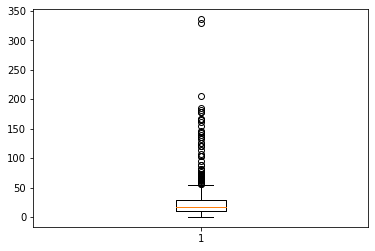

In [34]:
plt.boxplot(cab_df['Duration_Minutes'])
plt.show()

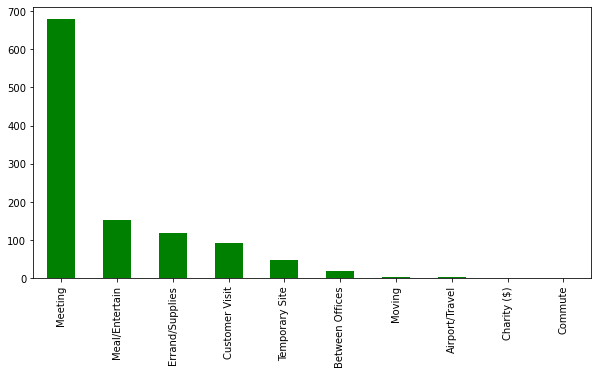

In [35]:
#see how many trips made by each purpose
purpose_time=cab_df['PURPOSE'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green')
plt.show()

In [ ]:
# calculate trip speed for each driver
